### Gender Classification

In [216]:
# Import required libraries

import pandas as pd # process data
import nltk
from nltk.tokenize import word_tokenize # tokenize words
from nltk.corpus import stopwords # stop words from common NLP library
import regex as re # regular expression
from nltk.stem.porter import PorterStemmer # Porter's Stemmer algorithm for stemming
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import string
import unicodedata # remove accents on lettering
from sklearn.model_selection import train_test_split # Split data into train and test set
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import accuracy_score # accuracy metric
from sklearn.linear_model import LogisticRegression # logistic regression modeling
from xgboost import XGBClassifier

#### Exploratory Data Analysis

In [217]:
# Read in the data as a dataframe

df = pd.read_csv('gender-classifier.csv', encoding = 'ISO-8859-1')

In [218]:
# Take a look at the dataframe

df.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [219]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [221]:
# Function for total number of records

def shape(df):
    shape = df.shape
    return("There are {} rows and {} columns in this dataset.".format(shape[0], shape[1]))

In [222]:
shape(df)

'There are 20050 rows and 26 columns in this dataset.'

In [223]:
# Check for NaN values

df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [224]:
# Dropping NaN descriptions (profile descriptions)

df = df[df['gender'] != 'brand']
df = df[df['gender'] != 'unknown']
df.reset_index(drop=True)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12986,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
12987,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
12988,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
12989,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [225]:
shape(df)

'There are 12991 rows and 26 columns in this dataset.'

In [226]:
df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           36
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               1715
fav_number                   0
gender_gold              12955
link_color                   0
name                         0
profile_yn_gold          12955
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              12913
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            4189
user_timezone             4427
dtype: int64

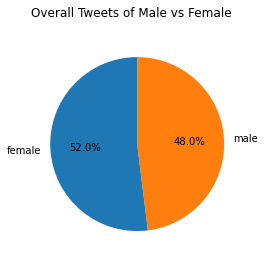

In [227]:
pd.value_counts(df['gender']).plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%', labels = ('female', 'male'))
plt.suptitle('Overall Tweets of Male vs Female')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [228]:
# The focus will be on the following variables 
# gender - male, female or brand
# description - twitter profile description
# text - the text from a tweet

df1 = df[['gender', 'description', 'text']]

In [229]:
df1.head(10)

,gender,description,text
0,male,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...
5,female,you don't know me.,"Ive seen people on the train with lamps, chair..."
7,male,The secret of getting ahead is getting started.,Gala Bingo clubs bought for å£241m: The UK's l...
8,female,Pll Fan // Crazy about MCD // Ramen is bae,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,female,"Renaissance art historian, University of Notti...",@Evielady just how lovely is the tree this yea...
12,female,Senior '16 . XI-XII-MMXIV.,Just put my ass on the line for you and this i...


In [230]:
shape(df1)

'There are 12991 rows and 3 columns in this dataset.'

In [231]:
# Convert gender to 1 for female, and 0 for everything else, which should 
# only male as brand and unknown were removed

df1['gender'] = [1 if each == 'female' else 0 for each in df1['gender']]

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [232]:
df1.head()

,gender,description,text
0,0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


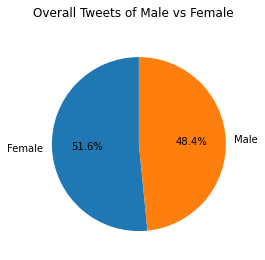

In [233]:
pd.value_counts(df1['gender']).plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%', labels = ('Female', 'Male'))
plt.suptitle('Overall Tweets of Male vs Female')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [234]:
df = df.dropna(subset=['description'])
df = df.dropna(subset=['gender'])

In [235]:
df1.isnull().sum()

gender            0
description    1715
text              0
dtype: int64

In [236]:
df1.groupby(['gender']).count()

,description,text
gender,,
0,5551,6291
1,5725,6700


#### Cleaning the Tweets and Profile Description

In [237]:
def cleaning(s):
    
    # function using sub methods to clean data by finding what to replace
    # and substituting or replacing it
    
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*","")
    return s

In [238]:
# Create new columns and apply cleaning function to text and description

df1['Tweets'] = [cleaning(s) for s in df1['text']]
df1['Description'] = [cleaning(s) for s in df1['description']]

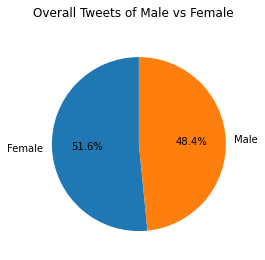

In [239]:
pd.value_counts(df1['gender']).plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%', labels = ('Female', 'Male'))
plt.suptitle('Overall Tweets of Male vs Female')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [240]:
df1.head()

,gender,description,text,Tweets,Description
0,0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,robbie e responds to critics after win against...,i sing my own rhythm
1,0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,ûïit felt like they were my friends and i was...,i m the author of novels filled with family dr...
2,0,louis whining and squealing and all,i absolutely adore when louis starts the songs...,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking at the url do you use ...,mobile guy ers shazam google kleiner perkins y...
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,watching neighbours on sky catching up with th...,ricky wilson the best frontman kaiser chiefs t...


In [241]:
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [242]:
for x in df1['Description']:
    strip_accents(x)

In [243]:
for x in df1['Tweets']:
    strip_accents(x)

In [244]:
df1.head(10)

,gender,description,text,Tweets,Description
0,0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,robbie e responds to critics after win against...,i sing my own rhythm
1,0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,ûïit felt like they were my friends and i was...,i m the author of novels filled with family dr...
2,0,louis whining and squealing and all,i absolutely adore when louis starts the songs...,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking at the url do you use ...,mobile guy ers shazam google kleiner perkins y...
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,watching neighbours on sky catching up with th...,ricky wilson the best frontman kaiser chiefs t...
5,1,you don't know me.,"Ive seen people on the train with lamps, chair...",ive seen people on the train with lamps chairs...,you don t know me
7,0,The secret of getting ahead is getting started.,Gala Bingo clubs bought for å£241m: The UK's l...,gala bingo clubs bought for å m the uk s large...,the secret of getting ahead is getting started
8,1,Pll Fan // Crazy about MCD // Ramen is bae,@_Aphmau_ the pic defines all mcd fangirls/fan...,aphmau the pic defines all mcd fangirls fanbo...,pll fan crazy about mcd ramen is bae
9,1,"Renaissance art historian, University of Notti...",@Evielady just how lovely is the tree this yea...,evielady just how lovely is the tree this yea...,renaissance art historian university of nottin...
12,1,Senior '16 . XI-XII-MMXIV.,Just put my ass on the line for you and this i...,just put my ass on the line for you and this i...,senior xi xii mmxiv


### Remove Stop Words
The purpose of stemming is to identify the stem, or base word, so that words with the same base words are treated the same.
Below, the porter stemming algorithm is used to identify stem words, and remove stop words.

In [245]:
# Load stop words, split Tweet string and lowercase, do the same to description
stop = set(stopwords.words('english'))
df1['Tweets'] = df1['Tweets'].str.lower().str.split()
df1['Description'] = df1['Description'].str.lower().str.split()

# Remove stop words
df1['Tweets'] = df1['Tweets'].apply(lambda x: [item for item in x if item not in stop])
df1['Description'] = df1['Description'].apply(lambda x: [item for item in x if item not in stop])

In [246]:
# Check stop words

print(stop)

{'there', "wouldn't", 'her', "don't", 'should', 'because', 'of', "doesn't", 'now', 'she', 'their', 'if', 'they', 'up', 'not', "you're", 'each', 'being', 'won', 'shouldn', 'between', 'o', 'so', 'at', 'out', 'ain', 'a', 'but', 'had', 'your', "she's", 'is', 'through', 'which', 'has', "shouldn't", 'down', 'most', "didn't", 'be', "wasn't", 'don', 'shan', 'about', 'that', 'only', 'couldn', 'me', "you'll", 'both', 'too', 'some', 'll', 'hadn', 'under', 'yourself', 'itself', 'or', 'any', "won't", 're', 'aren', 'no', 'yourselves', 'having', 'been', 'hasn', 'am', 'ma', 'weren', 'did', 'myself', 'once', "hadn't", "haven't", 'same', "isn't", 'hers', 'below', 'against', 'themselves', 'm', 'what', 'over', 'off', 'he', 'further', 'have', 'wouldn', 'i', "should've", 'can', 'own', "mustn't", 'his', 'ourselves', 'after', "it's", 'this', 'we', 'are', "needn't", 't', 'ours', 'it', 'didn', "hasn't", 'him', 'and', 'haven', 'mustn', 'himself', "shan't", 'those', 'again', 'while', 've', 'during', 'here', "aren

In [247]:
# Confirm stop words removed

print(df1['Tweets'][0:10])

0     [robbie, e, responds, critics, win, eddie, edw...
1     [ûïit, felt, like, friends, living, story, û, ...
2     [absolutely, adore, louis, starts, songs, hits...
3     [hi, jordanspieth, looking, url, use, ifttt, t...
4     [watching, neighbours, sky, catching, neighbs,...
5     [ive, seen, people, train, lamps, chairs, tvs,...
7     [gala, bingo, clubs, bought, å, uk, largest, h...
8     [aphmau, pic, defines, mcd, fangirls, fanboys,...
9     [evielady, lovely, tree, year, never, seen, go...
12                              [put, ass, line, repay]
Name: Tweets, dtype: object


In [248]:
print(df1['Description'][0:10])

0                                        [sing, rhythm]
1      [author, novels, filled, family, drama, romance]
2                           [louis, whining, squealing]
3     [mobile, guy, ers, shazam, google, kleiner, pe...
4     [ricky, wilson, best, frontman, kaiser, chiefs...
5                                                [know]
7            [secret, getting, ahead, getting, started]
8                    [pll, fan, crazy, mcd, ramen, bae]
9     [renaissance, art, historian, university, nott...
12                             [senior, xi, xii, mmxiv]
Name: Description, dtype: object


In [249]:
df1.head(10)

,gender,description,text,Tweets,Description
0,0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,"[robbie, e, responds, critics, win, eddie, edw...","[sing, rhythm]"
1,0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,"[ûïit, felt, like, friends, living, story, û, ...","[author, novels, filled, family, drama, romance]"
2,0,louis whining and squealing and all,i absolutely adore when louis starts the songs...,"[absolutely, adore, louis, starts, songs, hits...","[louis, whining, squealing]"
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,"[hi, jordanspieth, looking, url, use, ifttt, t...","[mobile, guy, ers, shazam, google, kleiner, pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,"[watching, neighbours, sky, catching, neighbs,...","[ricky, wilson, best, frontman, kaiser, chiefs..."
5,1,you don't know me.,"Ive seen people on the train with lamps, chair...","[ive, seen, people, train, lamps, chairs, tvs,...",[know]
7,0,The secret of getting ahead is getting started.,Gala Bingo clubs bought for å£241m: The UK's l...,"[gala, bingo, clubs, bought, å, uk, largest, h...","[secret, getting, ahead, getting, started]"
8,1,Pll Fan // Crazy about MCD // Ramen is bae,@_Aphmau_ the pic defines all mcd fangirls/fan...,"[aphmau, pic, defines, mcd, fangirls, fanboys,...","[pll, fan, crazy, mcd, ramen, bae]"
9,1,"Renaissance art historian, University of Notti...",@Evielady just how lovely is the tree this yea...,"[evielady, lovely, tree, year, never, seen, go...","[renaissance, art, historian, university, nott..."
12,1,Senior '16 . XI-XII-MMXIV.,Just put my ass on the line for you and this i...,"[put, ass, line, repay]","[senior, xi, xii, mmxiv]"


### Explore Word Frequency Count

In [250]:
# Create seperate dataframe with just male

male = df1[df1['gender'] == 0]
print(male)
male.head()

       gender                                        description  \
0           0                              i sing my own rhythm.   
1           0  I'm the author of novels filled with family dr...   
2           0                louis whining and squealing and all   
3           0  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
7           0    The secret of getting ahead is getting started.   
...       ...                                                ...   
20037       0  Typographer and typographic consultant, co-fou...   
20040       0  Houston Chronicle Columnist  - ken.hoffman@chr...   
20043       0  Head Chef, Chez Bruce. Loves Cars and Bicycles...   
20046       0  Whatever you like, it's not a problem at all. ...   
20047       0  #TeamBarcelona ..You look lost so you should f...   

                                                    text  \
0      Robbie E Responds To Critics After Win Against...   
1      ÛÏIt felt like they were my friends and I was...   
2  

,gender,description,text,Tweets,Description
0,0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,"[robbie, e, responds, critics, win, eddie, edw...","[sing, rhythm]"
1,0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,"[ûïit, felt, like, friends, living, story, û, ...","[author, novels, filled, family, drama, romance]"
2,0,louis whining and squealing and all,i absolutely adore when louis starts the songs...,"[absolutely, adore, louis, starts, songs, hits...","[louis, whining, squealing]"
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,"[hi, jordanspieth, looking, url, use, ifttt, t...","[mobile, guy, ers, shazam, google, kleiner, pe..."
7,0,The secret of getting ahead is getting started.,Gala Bingo clubs bought for å£241m: The UK's l...,"[gala, bingo, clubs, bought, å, uk, largest, h...","[secret, getting, ahead, getting, started]"


In [251]:
# Create seperate dataframe with just female

female = df1[df1['gender'] == 1]
print(female)
female.head()

       gender                                        description  \
4           1  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
5           1                                 you don't know me.   
8           1         Pll Fan // Crazy about MCD // Ramen is bae   
9           1  Renaissance art historian, University of Notti...   
12          1                         Senior '16 . XI-XII-MMXIV.   
...       ...                                                ...   
20039       1          You can find me where the wild things are   
20044       1                       I Love Me...Myself....&....I   
20045       1                                               (rp)   
20048       1  Anti-statist; I homeschool my kids. Aspiring t...   
20049       1                     Teamwork makes the dream work.   

                                                    text  \
4      Watching Neighbours on Sky+ catching up with t...   
5      Ive seen people on the train with lamps, chair...   
8  

,gender,description,text,Tweets,Description
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,"[watching, neighbours, sky, catching, neighbs,...","[ricky, wilson, best, frontman, kaiser, chiefs..."
5,1,you don't know me.,"Ive seen people on the train with lamps, chair...","[ive, seen, people, train, lamps, chairs, tvs,...",[know]
8,1,Pll Fan // Crazy about MCD // Ramen is bae,@_Aphmau_ the pic defines all mcd fangirls/fan...,"[aphmau, pic, defines, mcd, fangirls, fanboys,...","[pll, fan, crazy, mcd, ramen, bae]"
9,1,"Renaissance art historian, University of Notti...",@Evielady just how lovely is the tree this yea...,"[evielady, lovely, tree, year, never, seen, go...","[renaissance, art, historian, university, nott..."
12,1,Senior '16 . XI-XII-MMXIV.,Just put my ass on the line for you and this i...,"[put, ass, line, repay]","[senior, xi, xii, mmxiv]"


In [252]:
# Create seperate series in order to count top 20 words, clean again

male_top_words = pd.Series(' '.join(male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
female_top_words = pd.Series(' '.join(female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]

In [253]:
male_top_words

'ù',         371
'like',      325
'get',       310
'û',         236
'one',       213
'new',       196
'time',      193
'go',        187
'love',      184
'day',       165
'know',      155
'people',    155
'good',      152
'see',       151
'amp',       151
'would',     141
'back',      140
'think',     135
'make',      134
'got',       133
dtype: int64

In [254]:
female_top_words

'ù',         1027
'like',       403
'get',        314
'one',        270
'day',        253
'ù']          249
'love',       240
'go',         239
'û',          235
'time',       201
'amp',        196
'people',     194
'âù',         189
'know',       174
'last',       171
'new',        170
'got',        157
'ü',          155
'back',       155
'make',       154
dtype: int64

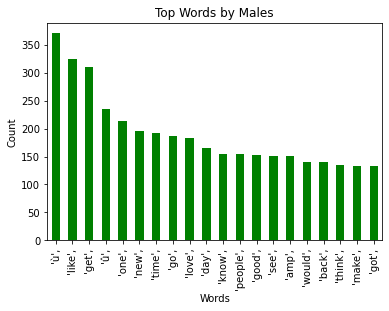

In [255]:
male_top_words.plot(kind='bar', stacked=True, color='green')
plt.title('Top Words by Males')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

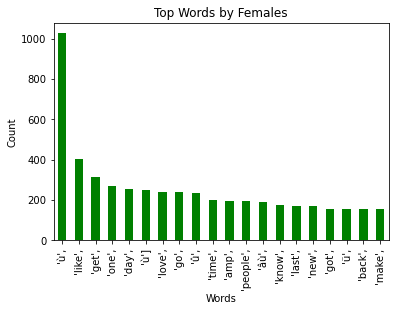

In [256]:
female_top_words.plot(kind='bar', stacked=True, color='green')
plt.title('Top Words by Females')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

### Porter Stemmer

In [257]:
porter_stem = PorterStemmer()

In [258]:
# Apply porter stemmer

df1['Tweets'] = df1['Tweets'].apply(lambda x : [porter_stem.stem(item) for item in x])
df1['Description'] = df1['Description'].apply(lambda x: [porter_stem.stem(item) for item in x])

In [259]:
df1.head(10)

,gender,description,text,Tweets,Description
0,0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,"[robbi, e, respond, critic, win, eddi, edward,...","[sing, rhythm]"
1,0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,"[ûïit, felt, like, friend, live, stori, û, arn...","[author, novel, fill, famili, drama, romanc]"
2,0,louis whining and squealing and all,i absolutely adore when louis starts the songs...,"[absolut, ador, loui, start, song, hit, hard, ...","[loui, whine, squeal]"
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,"[hi, jordanspieth, look, url, use, ifttt, typi...","[mobil, guy, er, shazam, googl, kleiner, perki..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,"[watch, neighbour, sky, catch, neighb, xxx, ù,...","[ricki, wilson, best, frontman, kaiser, chief,..."
5,1,you don't know me.,"Ive seen people on the train with lamps, chair...","[ive, seen, peopl, train, lamp, chair, tv, etc...",[know]
7,0,The secret of getting ahead is getting started.,Gala Bingo clubs bought for å£241m: The UK's l...,"[gala, bingo, club, bought, å, uk, largest, hi...","[secret, get, ahead, get, start]"
8,1,Pll Fan // Crazy about MCD // Ramen is bae,@_Aphmau_ the pic defines all mcd fangirls/fan...,"[aphmau, pic, defin, mcd, fangirl, fanboy, mcd...","[pll, fan, crazi, mcd, ramen, bae]"
9,1,"Renaissance art historian, University of Notti...",@Evielady just how lovely is the tree this yea...,"[evieladi, love, tree, year, never, seen, gorg...","[renaiss, art, historian, univers, nottingham,..."
12,1,Senior '16 . XI-XII-MMXIV.,Just put my ass on the line for you and this i...,"[put, ass, line, repay]","[senior, xi, xii, mmxiv]"


In [260]:
# Now that we know we have cleaned appropriately,
# we can create a new dataset with only our clean columns

df2 = df1[['gender', 'Tweets', 'Description']]

In [261]:
# Let's check and confirm our text is still clean

df2.head()

,gender,Tweets,Description
0,0,"[robbi, e, respond, critic, win, eddi, edward,...","[sing, rhythm]"
1,0,"[ûïit, felt, like, friend, live, stori, û, arn...","[author, novel, fill, famili, drama, romanc]"
2,0,"[absolut, ador, loui, start, song, hit, hard, ...","[loui, whine, squeal]"
3,0,"[hi, jordanspieth, look, url, use, ifttt, typi...","[mobil, guy, er, shazam, googl, kleiner, perki..."
4,1,"[watch, neighbour, sky, catch, neighb, xxx, ù,...","[ricki, wilson, best, frontman, kaiser, chief,..."


### Count Vectorization
Count vectorization converts text data to numbers so it can be passed to the model.  Each input is preprocessed, tokenized (at word level) and represented as a sparse matrix.

https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c


In [262]:
df2['Tweets'] = [cleaning(s) for s in df2['Tweets']]
df2['Description'] = [cleaning(s) for s in df2['Description']]

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [263]:
# Function using CountVectorizer to preprocess, tokenize and 
# printing the top words used and returning sparse matrix as x
# and the y values which are 1 or 0 (our target variable of female or male)

def count_vector(dataset_y, dataset_x):
    y = dataset_y.values
    count_vectorizer = CountVectorizer(max_features = 1000)
    sparse_matrix = count_vectorizer.fit_transform(dataset_x).toarray()
    X = sparse_matrix
    print('The top 1,000 words used: {}'.format(count_vectorizer.get_feature_names()))
    return X, y

In [264]:
# Let's first use gender and tweets, then we will create a separate model 
# for gender and profile description

x, y = count_vector(df2['gender'], df2['Tweets'])

The top 1,000 words used: ['abl', 'absolut', 'ach', 'across', 'act', 'action', 'actual', 'acunt', 'ad', 'add', 'adel', 'af', 'afternoon', 'age', 'agent', 'ago', 'agre', 'air', 'album', 'aliv', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'alway', 'ama', 'amaz', 'america', 'american', 'amount', 'amp', 'anim', 'announc', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anyway', 'app', 'appar', 'appl', 'appli', 'appreci', 'arm', 'around', 'arriv', 'art', 'articl', 'artist', 'artistoftheyear', 'ask', 'ass', 'attent', 'auction', 'automat', 'away', 'awesom', 'babe', 'babi', 'back', 'bad', 'bag', 'ball', 'ban', 'band', 'bank', 'bar', 'base', 'basic', 'bathroom', 'bc', 'beach', 'bear', 'beat', 'beauti', 'bed', 'begin', 'behind', 'believ', 'beme', 'benefit', 'best', 'better', 'big', 'biggest', 'bill', 'birthday', 'bit', 'bitch', 'black', 'blame', 'bless', 'block', 'blog', 'blood', 'blow', 'blue', 'board', 'bodi', 'bond', 'book', 'bore', 'bottom', 'bought', 'bout', 'box', 'boy'

In [265]:
z, w = count_vector(df2['gender'], df2['Description'])

The top 1,000 words used: ['ach', 'achiev', 'act', 'activ', 'activist', 'actor', 'actress', 'actual', 'acunt', 'add', 'addict', 'adult', 'adventur', 'advisor', 'advoc', 'af', 'aficionado', 'african', 'age', 'air', 'aka', 'aliv', 'alreadi', 'also', 'alum', 'alway', 'amateur', 'amaz', 'ambassador', 'america', 'american', 'analyst', 'angel', 'anim', 'anoth', 'anti', 'anyon', 'anyth', 'app', 'armi', 'around', 'arsen', 'art', 'artist', 'ask', 'aspir', 'ass', 'assist', 'associ', 'atheist', 'athlet', 'au', 'author', 'avail', 'averag', 'avid', 'award', 'away', 'awesom', 'awkward', 'babe', 'babi', 'back', 'bad', 'bae', 'ball', 'band', 'base', 'basebal', 'basic', 'basketbal', 'bbc', 'bear', 'beat', 'beauti', 'beer', 'believ', 'belong', 'beme', 'best', 'better', 'bi', 'bieber', 'big', 'bio', 'bit', 'bitch', 'black', 'blacklivesmatt', 'bless', 'block', 'blog', 'blogger', 'blue', 'board', 'bodi', 'book', 'born', 'bot', 'box', 'boy', 'brain', 'brand', 'break', 'breath', 'bring', 'british', 'bro', 'b

In [266]:
y = y.reshape(-1,1)

In [267]:
print(x.shape)
print(y.shape)

(12991, 1000)
(12991, 1)


In [268]:
w = w.reshape(-1, 1)
print(z.shape)
print(w.shape)

(12991, 1000)
(12991, 1)


### Split Data into Train and Test Set

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [270]:
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracy = 100.0 * nb.score(x_test, y_test)
print('Accuracy:', accuracy)

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 57.30769230769231


In [165]:
nb_multi = MultinomialNB()
nb_multi.fit(x_train, y_train)
y_pred = nb_multi.predict(x_test)
accuracy = 100.0 * (accuracy_score(y_test, y_pred))
print('Accuracy:', accuracy)

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 57.232142857142854


In [166]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = 100.0 * (accuracy_score(y_test, y_pred))
print('Accuracy:', accuracy)

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 55.625


In [83]:
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, x_train, y_train, cv=5)
print(cv.mean())

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [167]:
z_train, z_test, w_train, w_test = train_test_split(z, w, test_size = 0.1, random_state = 42)

In [170]:
nb = GaussianNB()
nb.fit(z_train, w_train)
accuracy = 100.0 * (nb.score(z_test, w_test))
print('Accuracy:', accuracy)

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 63.482142857142854


In [171]:
nb_multi = MultinomialNB()
nb_multi.fit(z_train, w_train)
w_pred = nb_multi.predict(z_test)
accuracy = 100.0 * (accuracy_score(w_test, w_pred))
print('Accuracy:', accuracy)

Accuracy: 64.28571428571429


C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [172]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(z_train, w_train)
w_pred = lr.predict(z_test)
accuracy = 100.0 * (accuracy_score(w_test, w_pred))
print('Accuracy:', accuracy)

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 64.64285714285715


In [173]:
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, z_train, w_train, cv=5)
print(cv.mean())

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel